In [ ]:
#Behnoush Rostami
import numpy as np

def get_distances(x_train, x_test, metric):
    """
    A function that computes the pairwise distance between all points in x_train and x_test given a distance metric.
    :param x_train: training data set (n x d)
    :param x_test: test data set (m x d)
    :param metric:
        "euclidean": euclidean distance metric (L2 norm)
    :return distances: matrix of pairwise distances (m x n)
    """
    dispatch = {
        "euclidean": __euclidean
    }
    function = dispatch.get(metric, lambda u, v: print("Invalid metric"))
    return function(x_train, x_test)

def __euclidean(x_train, x_test):
    n = x_train.shape[0]
    m = x_test.shape[0]
    distances = np.zeros((m, n))
    for i in range(0, m):
        for j in range(0, n):
            distances[i, j] = np.linalg.norm(x_train[j, :] - x_test[i, :])
    return distances

import scipy.io as sio
import matplotlib.pyplot as plt
from numpy.linalg import inv
import pandas as pd

import matplotlib.pyplot as plt
########################################################################
# Data loading
########################################################################
np.random.seed(5)  # seed the random number generator
bodyfat = sio.loadmat('bodyfat_data.mat')
x = bodyfat['X']
y = bodyfat['y']

# split into train and test with seeded randomization
train_idx = np.random.choice(np.arange(x.shape[0]), 150, replace=False)
test_idx = list(set(np.arange(x.shape[0])) - set(train_idx))
x_train = x[train_idx, :]
y_train = y[train_idx]
x_test = x[test_idx, :]
y_test = y[test_idx]


def knn_predict(X_train, X_test, y_train, y_test, k):
    distance = __euclidean(X_train, X_test)
    neighbor_distances_and_indices = []
    neighbor_distances=[]
    for index, test_point in enumerate(X_test): 
        for index1, train_point in enumerate(X_train):
            neighbor_distances_and_indices.append((distance[index,index1],np.float(y_train[index1])))

    neh=[]
    n=0
    for i in range(len(X_test)):
      neighbo=sorted(neighbor_distances_and_indices[n:n+len(X_train)])[:k]
      neh.append(neighbo)
      n+=len(X_train)
    lable=np.zeros((len(X_test),1))
    n=0
    for n in range(len(X_test)):
      d=np.array(neh[n])
      mean=0
      for i in range(k):
        mean+=d[i,1]
      lable[n,0]=mean/k
    """ 
    n=0
    for n in range(len(X_test)):
      d=np.array(neh[n])
      mean=0
      for i in range(k):
        mean+=d[i,1]
      if mean >= k/2:
        lable[n,0]=1
      else:
        lable[n,0]=0
    """
    return neighbor_distances_and_indices,neh,lable
def getAccuracyNumeric(actual,predicted):
    error=0
    for i in range(len(predicted)):
        error+=pow((actual[i]-predicted[i]),2)
    error=error/len(predicted)-1
    return 100-error

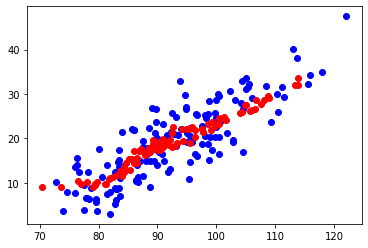

In [ ]:
a,b,c=knn_predict(x_train, x_test, y_train, y_test, 12)
plt.scatter(x_train[:,0],y_train, color='b')
plt.scatter(x_test[:,0],c, color='r')
plt.figure(1)
plt.show()

In [ ]:
ac=getAccuracyNumeric(y_test,c)
ac

array([78.20312854])